# **Langkah 1: Load Dataset**
*Pada tahap ini, dilakukan proses pengambilan dataset dalam format CSV yang disimpan di GitHub menggunakan pustaka pandas. Setelah dataset berhasil dimuat, lima baris pertama ditampilkan menggunakan fungsi df.head() untuk memastikan bahwa data terbaca dengan benar dan untuk memberikan gambaran awal mengenai struktur serta isi data yang akan dianalisis. Dataset ini berisi hasil survei mengenai kesehatan mental para pekerja di bidang teknologi.*

In [25]:
# ambil csv dari github
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/Aiurskiesyx/ML/refs/heads/main/survey.csv"
df = pd.read_csv(url)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# **Langkah 2: Preprocessing Data**
*Pada tahap preprocessing, langkah pertama yang dilakukan adalah menyalin dataset asli ke dalam variabel baru bernama df_clean untuk menjaga data mentah tetap aman dan tidak terpengaruh oleh proses pembersihan. Selanjutnya, tiga kolom yang dianggap tidak relevan untuk proses prediksi, yaitu Timestamp, state, dan comments, dihapus karena tidak memberikan informasi penting atau sulit diproses oleh model. Setelah itu, seluruh baris yang memiliki nilai kosong (missing values) dihapus menggunakan dropna() agar tidak mengganggu proses pelatihan model. Terakhir, dilakukan transformasi terhadap kolom target treatment, yaitu dengan mengubah nilai 'Yes' menjadi 1 dan 'No' menjadi 0, sehingga dapat digunakan sebagai label biner dalam algoritma klasifikasi machine learning. Semua langkah ini bertujuan untuk memastikan bahwa data bersih, relevan, dan siap digunakan dalam proses modeling.*

In [26]:
# Salin data agar data asli tetap aman
df_clean = df.copy()

# Hapus kolom yang tidak berguna untuk prediksi
df_clean.drop(columns=['Timestamp', 'state', 'comments'], inplace=True)


In [27]:
# Hapus semua baris yang memiliki data kosong
df_clean.dropna(inplace=True)


In [28]:
# Kolom treatment adalah target kita → ubah 'Yes' ke 1 dan 'No' ke 0
df_clean['treatment'] = df_clean['treatment'].map({'Yes': 1, 'No': 0})


# **Langkah 3: Encoding Kolom Kategorikal**
*Dalam langkah ini, semua fitur yang memiliki tipe data kategorikal (teks) diidentifikasi terlebih dahulu menggunakan fungsi select_dtypes() dari pustaka pandas, lalu disimpan dalam list categorical_cols. Hal ini dilakukan agar proses encoding hanya diterapkan pada kolom yang memang memerlukan konversi. Kemudian, setiap kolom dalam list tersebut dikonversi ke bentuk numerik menggunakan LabelEncoder, yaitu metode encoding yang mengubah kategori teks menjadi angka secara otomatis. Proses ini penting untuk memastikan seluruh data memiliki format numerik, karena algoritma machine learning seperti Random Forest atau Naïve Bayes tidak dapat bekerja dengan data dalam bentuk teks secara langsung.*

In [29]:
from sklearn.preprocessing import LabelEncoder

# Cari semua kolom bertipe object (teks)
categorical_cols = df_clean.select_dtypes(include='object').columns.tolist()

# Lakukan Label Encoding pada semua kolom teks
le = LabelEncoder()
for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

# **Langkah 4: Membagi Data (Train-Test Split)**
*Pada tahap ini, dataset yang telah dibersihkan dan diencoding dibagi menjadi dua bagian, yaitu data fitur (X) dan data target (y). Data fitur mencakup seluruh kolom kecuali kolom treatment, yang merupakan target untuk diprediksi. Selanjutnya, dilakukan pembagian data ke dalam data latih (X_train, y_train) dan data uji (X_test, y_test) menggunakan fungsi train_test_split dari pustaka sklearn. Proporsi pembagian ditentukan sebesar 80% untuk pelatihan dan 20% untuk pengujian. Parameter random_state=42 digunakan agar hasil pembagian bersifat konsisten setiap kali kode dijalankan, sehingga hasil evaluasi model dapat direproduksi dengan stabil.*

In [30]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_clean.drop('treatment', axis=1)
y = df_clean['treatment']

# Bagi data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# **Langkah 5: Melatih dan Mengevaluasi Model Naïve Bayes**
*Pada tahap ini, model klasifikasi Naïve Bayes diinisialisasi menggunakan GaussianNB dari pustaka sklearn, yang cocok digunakan ketika data bersifat numerik dan mengikuti distribusi normal. Setelah model dibuat, dilakukan pelatihan (training) menggunakan data latih (X_train dan y_train). Model kemudian digunakan untuk memprediksi label pada data uji (X_test), dan hasil prediksi tersebut dibandingkan dengan label sebenarnya (y_test) untuk mengevaluasi performa model. Evaluasi dilakukan dengan menghitung akurasi menggunakan accuracy_score serta menghasilkan metrik lengkap seperti precision, recall, dan f1-score melalui classification_report. Langkah ini memberikan gambaran seberapa baik model dapat mengklasifikasikan apakah seseorang pernah mencari bantuan profesional terkait kesehatan mental.*

In [31]:
# Import library yang dibutuhkan
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# --------------------------------------------
# 🧠 Langkah 1: Inisialisasi model Naïve Bayes
# --------------------------------------------
nb_model = GaussianNB()

# --------------------------------------------
# 🏋️ Langkah 2: Latih model dengan data training
# --------------------------------------------
nb_model.fit(X_train, y_train)

# --------------------------------------------
# 🔍 Langkah 3: Prediksi data testing
# --------------------------------------------
y_pred_nb = nb_model.predict(X_test)

# --------------------------------------------
# 📊 Langkah 4: Evaluasi performa model
# --------------------------------------------
print("=== Evaluasi Model Naïve Bayes ===")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print()
print(classification_report(y_test, y_pred_nb))


=== Evaluasi Model Naïve Bayes ===
Akurasi: 0.3469387755102041

              precision    recall  f1-score   support

           0       0.35      1.00      0.52        68
           1       0.00      0.00      0.00       128

    accuracy                           0.35       196
   macro avg       0.17      0.50      0.26       196
weighted avg       0.12      0.35      0.18       196



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Langkah 6: Melatih dan Mengevaluasi Model Random Forest**
*Langkah ini menggunakan algoritma Random Forest, yaitu model ensemble yang terdiri dari banyak decision tree dan memberikan hasil prediksi berdasarkan suara mayoritas dari seluruh pohon. Model diinisialisasi dengan parameter random_state=42 untuk memastikan hasil yang konsisten setiap kali dijalankan. Setelah di-training menggunakan data latih (X_train dan y_train), model digunakan untuk memprediksi label pada data uji (X_test). Kinerja model dievaluasi menggunakan akurasi dan metrik evaluasi lainnya (precision, recall, dan f1-score) dari classification_report. Model ini terbukti lebih andal dalam menangani data dengan fitur kompleks dan hasil evaluasinya sering kali lebih stabil dibanding metode sederhana seperti Naïve Bayes.*

In [32]:
# Import library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# --------------------------------------------
# 🧠 Langkah 1: Inisialisasi model Random Forest
# --------------------------------------------
rf_model = RandomForestClassifier(random_state=42)

# --------------------------------------------
# 🏋️ Langkah 2: Latih model dengan data training
# --------------------------------------------
rf_model.fit(X_train, y_train)

# --------------------------------------------
# 🔍 Langkah 3: Prediksi data testing
# --------------------------------------------
y_pred_rf = rf_model.predict(X_test)

# --------------------------------------------
# 📊 Langkah 4: Evaluasi performa model
# --------------------------------------------
print("=== Evaluasi Model Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print()
print(classification_report(y_test, y_pred_rf))


=== Evaluasi Model Random Forest ===
Akurasi: 0.8112244897959183

              precision    recall  f1-score   support

           0       0.82      0.59      0.68        68
           1       0.81      0.93      0.87       128

    accuracy                           0.81       196
   macro avg       0.81      0.76      0.77       196
weighted avg       0.81      0.81      0.80       196



# **Visualisasi Confusion Matrix untuk Evaluasi Model**


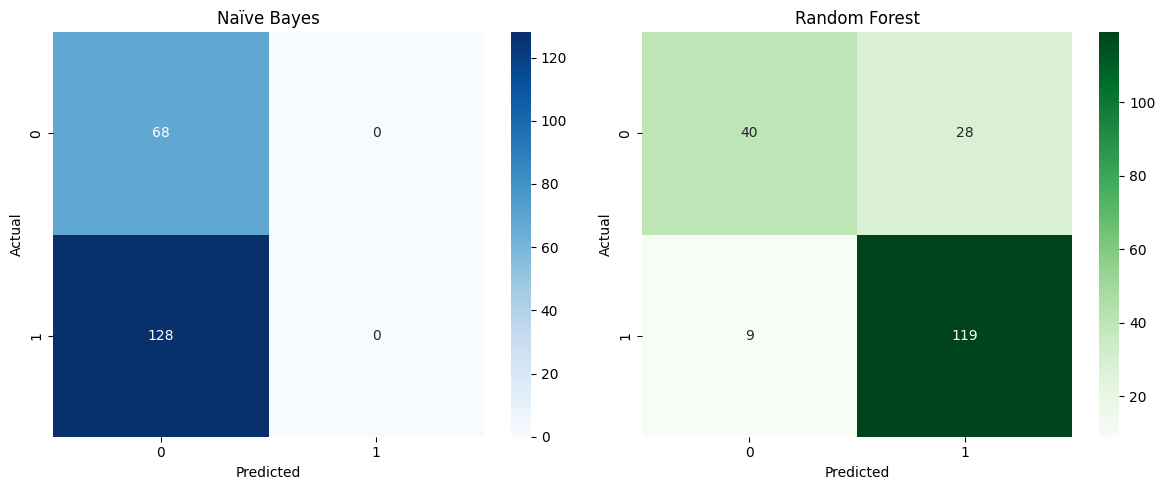

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tampilkan confusion matrix untuk kedua model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# NB
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Naïve Bayes')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# RF
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


*Gambar di atas memperlihatkan perbandingan performa antara model Naïve Bayes dan Random Forest dalam memprediksi apakah seseorang pernah mencari bantuan profesional terkait kesehatan mental. Pada model Naïve Bayes, seluruh data diprediksi sebagai kelas 0 (tidak mencari bantuan), dengan akurasi rendah serta recall untuk kelas 1 sebesar nol. Ini menunjukkan bahwa model gagal mengenali individu yang benar-benar membutuhkan bantuan, yang berisiko tinggi dalam konteks nyata. Sebaliknya, model Random Forest memberikan hasil yang jauh lebih seimbang. Sebanyak 119 dari 128 individu kelas 1 berhasil diklasifikasikan dengan benar, serta kesalahan prediksi lebih sedikit secara keseluruhan. Dengan demikian, Random Forest terbukti lebih unggul dalam hal akurasi dan keandalan untuk kasus klasifikasi ini.*

# **Langkah 7: Menampilkan Contoh Hasil Prediksi**
*Langkah ini bertujuan untuk menampilkan hasil prediksi model Random Forest dalam bentuk yang lebih mudah dipahami. Pertama, dibuat pemetaan label numerik ke bentuk teks agar lebih deskriptif, yaitu 0 menjadi "Tidak Pernah Mencari Bantuan" dan 1 menjadi "Pernah Mencari Bantuan". Kemudian, data testing (X_test) disalin untuk membuat tabel hasil yang rapi. Dua kolom baru ditambahkan: Actual berisi label sebenarnya dan Predicted berisi hasil prediksi dari model. Setelah itu, sepuluh baris pertama ditampilkan sebagai contoh, sehingga kita bisa dengan mudah melihat apakah prediksi yang diberikan model sesuai dengan data aktualnya.*

In [34]:
# Mapping angka ke label teks
label_map = {0: 'Tidak Pernah Mencari Bantuan', 1: 'Pernah Mencari Bantuan'}

# Buat salinan data hasil prediksi
hasil_rapi = X_test.copy()
hasil_rapi['Actual'] = y_test.map(label_map)
hasil_rapi['Predicted'] = y_pred_rf
hasil_rapi['Predicted'] = hasil_rapi['Predicted'].map(label_map)

# Lihat 10 contoh hasil prediksi
hasil_rapi.head(10)


,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Actual,Predicted
280,22,19,0,1,1,3,4,1,1,0,...,0,1,1,2,1,2,1,1,Pernah Mencari Bantuan,Pernah Mencari Bantuan
712,30,35,38,0,1,0,1,0,1,0,...,1,1,1,2,1,0,0,0,Tidak Pernah Mencari Bantuan,Tidak Pernah Mencari Bantuan
246,21,19,38,0,0,1,4,0,0,0,...,0,1,0,0,1,0,0,0,Pernah Mencari Bantuan,Pernah Mencari Bantuan
1008,39,15,38,0,1,3,4,1,1,1,...,1,1,1,2,0,2,2,0,Pernah Mencari Bantuan,Pernah Mencari Bantuan
106,35,15,38,0,1,3,2,1,1,0,...,1,1,1,2,1,0,1,0,Pernah Mencari Bantuan,Pernah Mencari Bantuan
643,57,19,38,0,0,0,2,0,1,2,...,2,0,0,0,1,0,0,1,Tidak Pernah Mencari Bantuan,Pernah Mencari Bantuan
925,29,35,38,0,0,3,5,0,1,2,...,2,0,0,0,1,1,0,0,Tidak Pernah Mencari Bantuan,Pernah Mencari Bantuan
723,25,19,38,0,1,0,4,1,1,0,...,2,1,1,2,1,1,1,0,Pernah Mencari Bantuan,Tidak Pernah Mencari Bantuan
1183,35,32,38,0,1,3,0,1,1,1,...,0,0,1,1,1,1,2,0,Pernah Mencari Bantuan,Pernah Mencari Bantuan
226,32,35,38,0,0,2,0,1,1,1,...,1,1,1,2,1,0,2,0,Tidak Pernah Mencari Bantuan,Pernah Mencari Bantuan


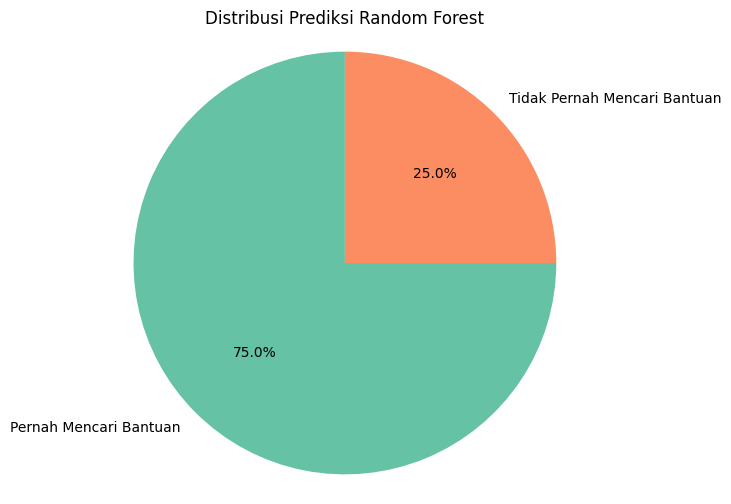

In [35]:
import matplotlib.pyplot as plt

# Pie chart distribusi hasil prediksi
pred_counts = hasil_rapi['Predicted'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(pred_counts, labels=pred_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribusi Prediksi Random Forest')
plt.axis('equal')
plt.show()


*📊 Berdasarkan pie chart, sebanyak 75% data uji diprediksi sebagai pernah mencari bantuan profesional, sementara 25% sebagai tidak pernah mencari bantuan. Ini menunjukkan kecenderungan model Random Forest untuk memprediksi mayoritas ke arah pencari bantuan.*


In [36]:
# Filter hanya baris yang salah diprediksi
salah_prediksi = hasil_rapi[hasil_rapi['Actual'] != hasil_rapi['Predicted']]
salah_prediksi.head(10)  # Lihat 10 contoh pertama


,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Actual,Predicted
643,57,19,38,0,0,0,2,0,1,2,...,2,0,0,0,1,0,0,1,Tidak Pernah Mencari Bantuan,Pernah Mencari Bantuan
925,29,35,38,0,0,3,5,0,1,2,...,2,0,0,0,1,1,0,0,Tidak Pernah Mencari Bantuan,Pernah Mencari Bantuan
723,25,19,38,0,1,0,4,1,1,0,...,2,1,1,2,1,1,1,0,Pernah Mencari Bantuan,Tidak Pernah Mencari Bantuan
226,32,35,38,0,0,2,0,1,1,1,...,1,1,1,2,1,0,2,0,Tidak Pernah Mencari Bantuan,Pernah Mencari Bantuan
690,23,35,7,0,0,3,4,0,1,2,...,0,0,1,1,1,1,0,0,Pernah Mencari Bantuan,Tidak Pernah Mencari Bantuan
117,27,19,7,0,0,2,4,0,0,2,...,0,1,1,2,1,1,0,0,Tidak Pernah Mencari Bantuan,Pernah Mencari Bantuan
1035,35,19,7,0,1,3,4,1,1,1,...,0,1,0,1,1,1,0,0,Tidak Pernah Mencari Bantuan,Pernah Mencari Bantuan
48,26,34,7,1,0,3,0,0,1,1,...,1,1,2,2,1,1,2,0,Tidak Pernah Mencari Bantuan,Pernah Mencari Bantuan
341,33,30,38,0,1,3,2,1,1,1,...,2,0,1,1,1,0,1,0,Tidak Pernah Mencari Bantuan,Pernah Mencari Bantuan
632,31,19,16,0,0,3,4,1,1,1,...,1,1,2,2,0,0,2,0,Tidak Pernah Mencari Bantuan,Pernah Mencari Bantuan


*Kesalahan prediksi terjadi karena model tidak selalu bisa membedakan pola yang halus antara orang yang pernah mencari bantuan dan yang tidak pernah. Misalnya, ada responden yang tidak pernah mencari bantuan, tapi punya riwayat masalah kesehatan mental di keluarga, terganggu pekerjaan karena kondisi mental, atau terbuka bicara ke atasan—fitur-fitur seperti itu bisa “menipu” model untuk memprediksi sebaliknya.*

*Sebaliknya, ada juga yang pernah mencari bantuan, tapi profilnya justru terlihat “normal” di data (misalnya tidak terganggu di kerja, tidak punya riwayat keluarga, dll), sehingga model mengira mereka tidak pernah mencari bantuan.*

*Hal ini wajar terjadi, apalagi jika data tidak seimbang atau fitur-fitur tertentu punya pengaruh yang besar tapi tidak konsisten di seluruh data.*